# Stochastic Volatility Pricing in Python
This guy implemented what looks like a Heston model to price... could be a nice reference, here is his code...

Code from: [https://towardsdatascience.com/stochastic-volatility-pricing-in-python-931f4b03d793]

In [1]:
import numpy as np

In [2]:
# Initial stock price
S = 100
# Risk-free rate of interest
r = .05
# Option strike price
X= 110
# Number of simulations to run
n = 1000
# Starting instantaneous variance
vt = .09
# How far to simulate the stock price out to (annum)
T = 1
# How large a step in time is (1/252 represents trading days)
dt = 1/252
# Correlation of random errors
rho = -.7
# Mean reversion parameters
alpha = .5
beta = 2
# Variance's volatility
sigma_var = .3
# Whether we are working with a call or put option
call = True
# Payoffs of the option after each simulation
payoffs = []

In [3]:
for i in range(0, n):
    # *** New simulation ***
    
    # Set initial stock price
    St = S
    # Set the instantaneous variance
    inst_var_now = vt
    # Set the previous instantaneous (will become clear in the next loop)
    prev_inst_var = inst_var_now
    # Reset the current time step index
    step = 0

# Step through by dt to T
    while(step < T):
        # Generate a new random error, e1
        e1 = np.random.randn()
        # Generate a new random error, e2 based on the correlation of random errors
        e2 = e1 * rho + np.sqrt(1 - (rho ** 2)) * np.random.randn()
        
        # Generate a new stock price based on the previous instantaneous variance
        St = St + r * St * dt + St * np.sqrt(prev_inst_var * dt) * e1
        # Assign the previous instantaneous variance to the current instantaneous variance
        prev_inst_var = inst_var_now
        # Recompute the instantaneous variance for THIS time step, it will be used in the NEXT time step's stock price
        inst_var_now = prev_inst_var + (alpha - beta * prev_inst_var) * dt + sigma_var * np.sqrt(prev_inst_var * dt) * e2
        
        # Instantaneous variance can become negative which will cause an error as the process becomes imaginary
        # To avoid this, if the isntantaneous variance becomes arbitrarily small, assign it to an arbitrarily small POSITIVE value
        if inst_var_now > 0.0000001:
            pass
        else:
            inst_var_now = 0.0000001
            
        # Step by dt
        step += dt

    # Define the payoff of the simulated price path
    payoff = 0

    # If the European option was a call
    if call:
        # If the final stock price was greator than the strike price
        if St > X:
            # Positive payoff, so add the payoff value
            payoff += (St - X)
        else:
            # Otherwise the difference is negative and the option expires worthless
            payoff = 0
            
    # If the European option was a put
    if not call:
        # If the final stock price was less than the strike price
        if  St < X:
            # Positive payoff, so add the payoff value
            payoff += (X - St)
        else:
            # Otherwise the difference is negative and the option expires worthless
            payoff = 0
    # Append the payoff to the array of payoffs
    payoffs.append((payoff *np.exp(-r * T)))
    # Outer loop runs a new simulation -->

In [4]:
print(np.average(payoffs))

14.177260265096313


In [5]:
len(payoffs)

1000

In [6]:
import numpy as np

S = 100
r = .05
X= 110
n = 1000
vt = .09
T = 1
dt = 1/252
rho = -.7
alpha = .5
beta = 2
sigma_var = .3
call = True
payoffs = []

for i in range(0, n):

    St = S
    inst_var_now = vt
    prev_inst_var = inst_var_now
    step = 0

    while(step < T):
        e1 = np.random.randn()
        e2 = e1 * rho + np.sqrt(1 - (rho ** 2)) * np.random.randn()

        St = St + r * St * dt + St * np.sqrt(prev_inst_var * dt) * e1

        prev_inst_var = inst_var_now

        inst_var_now = prev_inst_var + (alpha - beta * prev_inst_var) * dt + sigma_var * np.sqrt(prev_inst_var * dt) * e2

        if inst_var_now > 0.0000001:
            pass
        else:
            inst_var_now = 0.0000001
        step += dt

    payoff = 0

    if call:
        if St > X:
            payoff += (St - X)
        else:
            payoff = 0
    if not call:
        if  St < X:
            payoff += (X - St)
        else:
            payoff = 0

    payoffs.append((payoff *np.exp(-r * T)))

print(np.average(payoffs))

15.77487488625783


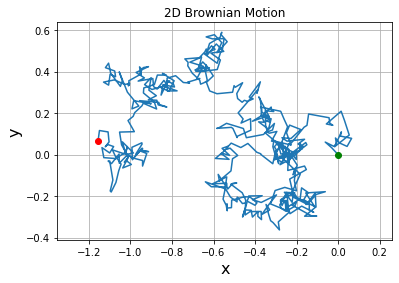

In [7]:
# 2D brownian...
from scipy.stats import norm
import matplotlib.pyplot as plt

def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*np.sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

# 2D walk
# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = np.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plt.plot(x[0],x[1])

# Mark the start and end points.
plt.plot(x[0,0],x[1,0], 'go')
plt.plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
plt.title('2D Brownian Motion')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis('equal')
plt.grid(True)
plt.show()

## Multivariate Normal

[https://peterroelants.github.io/posts/multivariate-normal-primer/]

In [8]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

In [9]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

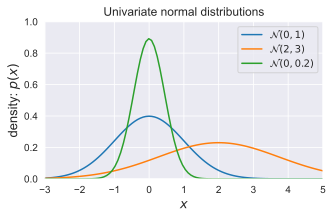

In [10]:
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()
#

In [11]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

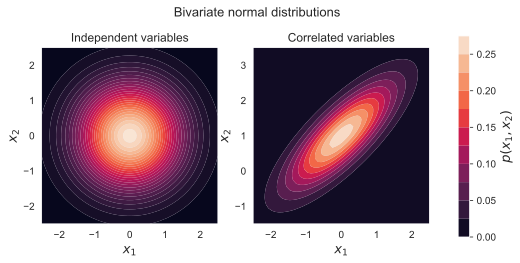

In [12]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(np.matrix([[x1[i,j]], [x2[i,j]]]), d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([[1., 0.], [0., 1.]])  # Covariance
x1, x2, p = generate_surface(bivariate_mean, bivariate_covariance, d)

# Plot bivariate distribution
con = ax1.contourf(x1, x2, p,30)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([[1., 0.8], [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(bivariate_mean, bivariate_covariance, d)

# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 10)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()
#

In [13]:
p.shape

(100, 100)

In [14]:
# Sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)
# Sample X from standard normal
n = 50  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = L.dot(X) + mean

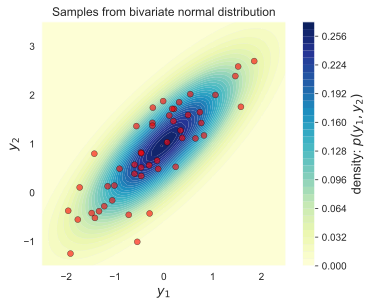

In [15]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()
#

## Pyswarm experiments
Can pyswarm be used to optimise the function as opposed to freaking Excel Solver which is the biggest black box solver going seeing as they dont publish the source code. Not sure why everyone is so in love with it?

In [16]:
from pyswarm import pso

In [17]:
def banana(x):
    x1 = x[0]
    x2 = x[1]
    return x1**4 - 2*x2*x1**2 + x2**2 + x1**2 - 2*x1 + 5

def con(x):
    x1 = x[0]
    x2 = x[1]
    return [-(x1 + 0.25)**2 + 0.75*x2]

lb = [-3, -1]
ub = [2, 6]

xopt, fopt = pso(banana, lb, ub, f_ieqcons=con)

Stopping search: Swarm best objective change less than 1e-08


In [18]:
xopt # is this the coordinates?

array([0.49949784, 0.74899602])

In [19]:
fopt # so this is the value of the thing at optimum?

4.500000593097563

In [23]:
import numpy as np
from pyswarm import pso

# Define the objective (to be minimize)
def weight(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return rho*2*np.pi*d*t*np.sqrt((B/2)**2 + H**2)

# Setup the constraint functions
def yield_stress(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return (P*np.sqrt((B/2)**2 + H**2))/(2*t*np.pi*d*H)

def buckling_stress(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return (np.pi**2*E*(d**2 + t**2))/(8*((B/2)**2 + H**2))

def deflection(x, *args):
    H, d, t = x
    B, rho, E, P = args
    return (P*np.sqrt((B/2)**2 + H**2)**3)/(2*t*np.pi*d*H**2*E)

def constraints(x, *args):
    strs = yield_stress(x, *args)
    buck = buckling_stress(x, *args)
    defl = deflection(x, *args)
    return [100 - strs, buck - strs, 0.25 - defl]

# Define the other parameters
B = 60  # inches
rho = 0.3  # lb/in^3
E = 30000  # kpsi (1000-psi)
P = 66  # kip (1000-lbs, force)
args = (B, rho, E, P)

# Define the lower and upper bounds for H, d, t, respectively
lb = [10, 1, 0.01]
ub = [30, 3, 0.25]

xopt, fopt = pso(weight, lb, ub, f_ieqcons=constraints, args=args)

# The optimal input values are approximately
#     xopt = [29, 2.4, 0.06]
# with function values approximately
#     weight          = 12 lbs
#     yield stress    = 100 kpsi (binding constraint)
#     buckling stress = 150 kpsi
#     deflection      = 0.2 in

Stopping search: Swarm best objective change less than 1e-08


In [24]:
print('xopt = ', xopt)
print('fopt = ', fopt)

xopt =  [28.98322874  2.31518081  0.06529959]
fopt =  11.887062618430527


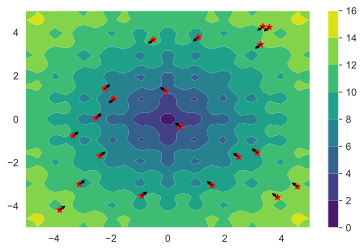

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [25]:
##### Another swarm... this one runs best from VS code as the output is animated... #####
##### https://github.com/sotostzam/particle-swarm-optimization/blob/master/main.py #####
# Code import to have a play...
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

DIMENSIONS = 2              # Number of dimensions
GLOBAL_BEST = 0             # Global Best of Cost function
B_LO = -5                   # Upper boundary of search space
B_HI = 5                    # Upper boundary of search space

POPULATION = 20             # Number of particles in the swarm
V_MAX = 0.1                 # Maximum velocity value
PERSONAL_C = 2.0            # Personal coefficient factor
SOCIAL_C = 2.0              # Social coefficient factor
CONVERGENCE = 0.001         # Convergence value
MAX_ITER = 100              # Maximum number of iterrations

# Particle class
class Particle():
    def __init__(self, x, y, z, velocity):
        self.pos = [x, y]
        self.pos_z = z
        self.velocity = velocity
        self.best_pos = self.pos.copy()

class Swarm():
    def __init__(self, pop, v_max):
        self.particles = []             # List of particles in the swarm
        self.best_pos = None            # Best particle of the swarm
        self.best_pos_z = math.inf      # Best particle of the swarm

        for _ in range(pop):
            x = np.random.uniform(B_LO, B_HI)
            y = np.random.uniform(B_LO, B_HI)
            z = cost_function(x, y)
            velocity = np.random.rand(2) * v_max
            particle = Particle(x, y, z, velocity)
            self.particles.append(particle)
            if self.best_pos != None and particle.pos_z < self.best_pos_z:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z
            else:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z

# Evaluate objective/cost function (Ackley)
def cost_function(x, y, a=20, b=0.2, c=2*math.pi):
    term_1 = np.exp((-b * np.sqrt(0.5 * (x ** 2 + y ** 2))))
    term_2 = np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return -1 * a * term_1 - term_2 + a + np.exp(1)

def particle_swarm_optimization():

    # Initialize plotting variables
    x = np.linspace(B_LO, B_HI, 50)
    y = np.linspace(B_LO, B_HI, 50)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure("Particle Swarm Optimization")

    # Initialize swarm
    swarm = Swarm(POPULATION, V_MAX)

    # Initialize inertia weight
    inertia_weight = 0.5 + (np.random.rand()/2)
    
    curr_iter = 0
    while curr_iter < MAX_ITER:

        fig.clf()
        ax = fig.add_subplot(1, 1, 1)
        ac = ax.contourf(X, Y, cost_function(X, Y), cmap='viridis')
        fig.colorbar(ac)

        for particle in swarm.particles:

            for i in range(0, DIMENSIONS):
                r1 = np.random.uniform(0, 1)
                r2 = np.random.uniform(0, 1)
                
                # Update particle's velocity
                personal_coefficient = PERSONAL_C * r1 * (particle.best_pos[i] - particle.pos[i])
                social_coefficient = SOCIAL_C * r2 * (swarm.best_pos[i] - particle.pos[i])
                new_velocity = inertia_weight * particle.velocity[i] + personal_coefficient + social_coefficient

                # Check if velocity is exceeded
                if new_velocity > V_MAX:
                    particle.velocity[i] = V_MAX
                elif new_velocity < -V_MAX:
                    particle.velocity[i] = -V_MAX
                else:
                    particle.velocity[i] = new_velocity

            ax.scatter(particle.pos[0], particle.pos[1], marker='*', c='r')
            ax.arrow(particle.pos[0], particle.pos[1], particle.velocity[0], particle.velocity[1], head_width=0.1, head_length=0.1, color='k')

            # Update particle's current position
            particle.pos += particle.velocity
            particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

            # Update particle's best known position
            if particle.pos_z < cost_function(particle.best_pos[0], particle.best_pos[1]):
                particle.best_pos = particle.pos.copy()

                # Update swarm's best known position
                if particle.pos_z < swarm.best_pos_z:
                    swarm.best_pos = particle.pos.copy()
                    swarm.best_pos_z = particle.pos_z
                    
            # Check if particle is within boundaries
            if particle.pos[0] > B_HI:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] > B_HI:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[0] < B_LO:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] < B_LO:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

        plt.subplots_adjust(right = 0.95)
        plt.pause(0.000001)

        # Check for convergence
        if abs(swarm.best_pos_z - GLOBAL_BEST) < CONVERGENCE:
            print("The swarm has met convergence criteria after " + str(curr_iter) + " iterrations.")
            break
        curr_iter += 1
    plt.show()

if __name__ == "__main__":
    particle_swarm_optimization()